<H1>Exploratory Data Analysis of Customer Segmentation and marketing campaigns</H1>

## Problem Statement


While going through the analysis, it is vital to have in mind an objective. We will attempt to answer the following questions through Visualization to see if we can find contributing factors to the success of the past campaigns.

- Which products are performing best?
- Which channels are underperforming?
- What does the average customer look like for the Company?
- Which marketing campaign is most successful?
- Which Regions perform best?
- Which costumer segment purchase more?
- What does the costumer segment which accepted the last marketing campaign look like?

## Importing Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


## Reading csv file

In [ ]:
dset = pd.read_csv("/content/marketing_data.csv")

In [ ]:
print("Number of datapoints:", len(dset))

Number of datapoints: 2240


In [ ]:
dset.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


In [ ]:
dset.tail(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [ ]:
dset.shape

(2240, 28)

In [ ]:
dset.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
dset.isnull().sum().sort_values(ascending=False)

 Income                24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

## Clean whitespace and converting datatype

In [ ]:
# clean up column names that contain whitespace
dset.columns = dset.columns.str.replace(' ', '')

In [ ]:
# transform Income column to a numerical
dset['Income'] = dset['Income'].str.replace('$', '')
dset['Income'] = dset['Income'].str.replace(',', '').astype('float')

In [ ]:
dset["Dt_Customer"] = pd.to_datetime(dset["Dt_Customer"])
#As it's a date, it's better to change to format of datetime
dates = []
for i in dset["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

<ipython-input-12-bb795b93e1ce>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dset["Dt_Customer"] = pd.to_datetime(dset["Dt_Customer"])


The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


## Handling null values or outliers

In [ ]:
dset['Income'].fillna(dset['Income'].median())

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
#To remove the NA values
dset = dset.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(dset))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
dset[dset.isnull()["Income"] == True].count()["ID"]
#There are 24 objects, it's better to get rid of them not to corrupt the whole picture and insights of the data

0

## Outliers

In [ ]:
dset.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')>

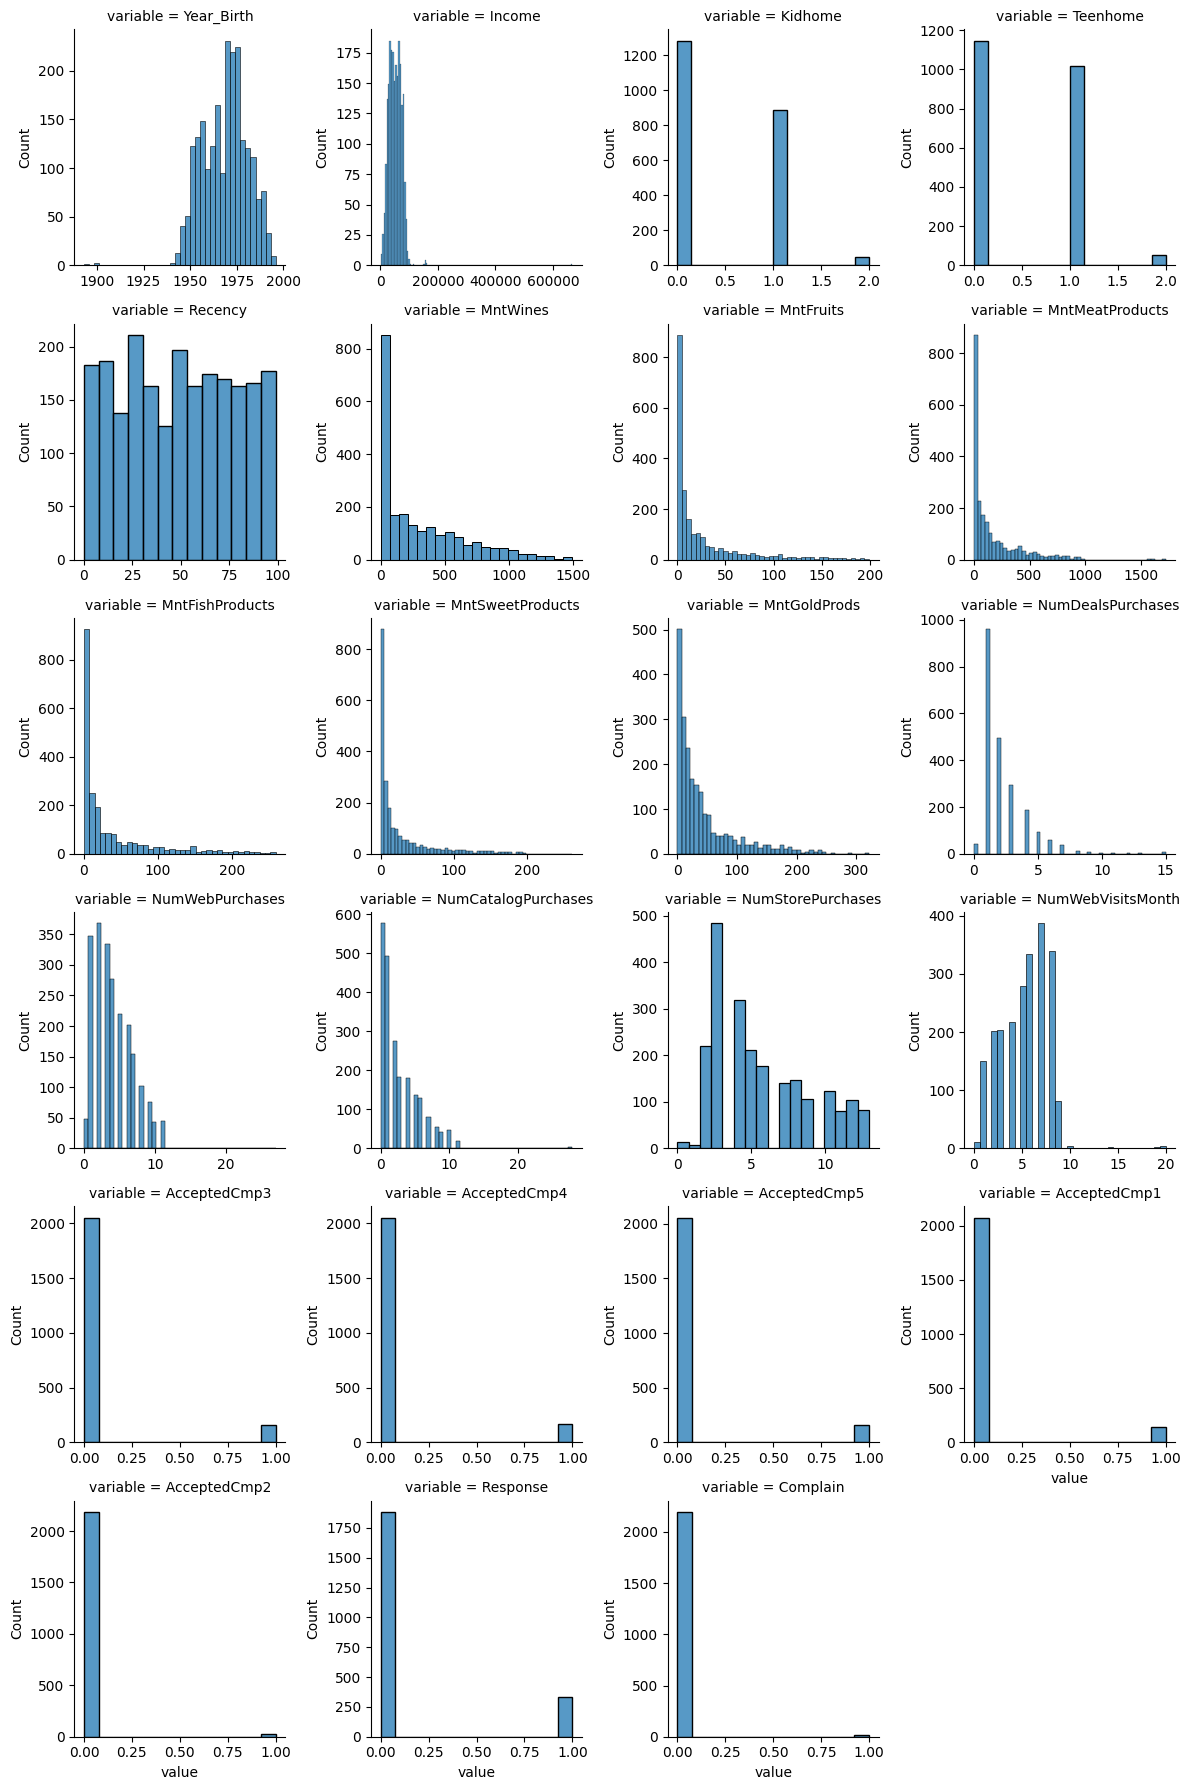

In [ ]:
#Show all distributions of all the features
#in the dataset except Country, Education and Martial_Status becouse they are
#objects

dist = pd.DataFrame(data = dset, columns = ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain'])
nd = pd.melt(dist, value_vars = dist)
n1 = sns.FacetGrid(nd, col = "variable", col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.histplot, "value")
plt.show()

<Axes: >

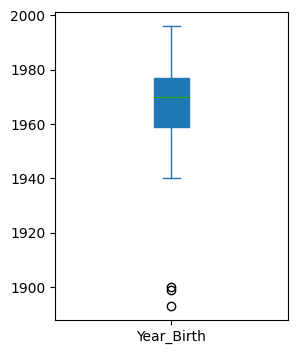

In [ ]:
dset['Year_Birth'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [ ]:
dset.drop(dset[dset['Year_Birth'] <= 1900].index, inplace = True) #Drop customers who were born before 1900.

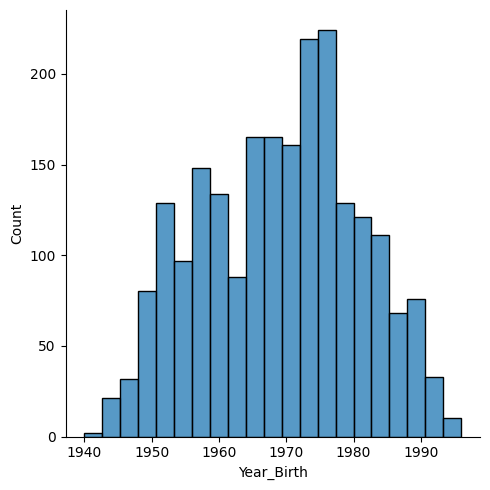

In [ ]:
sns.displot(dset['Year_Birth']) #Distribution of Year_Birth feature
plt.show()

<Axes: >

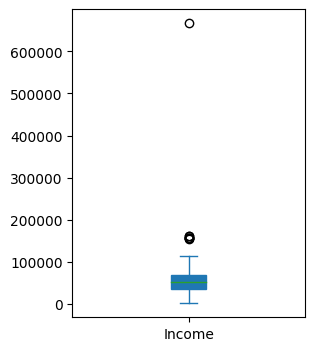

In [ ]:
dset['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [ ]:
dset["Income"].describe() #Quantiles, mean, std of Income feature

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: xlabel='Income', ylabel='Density'>

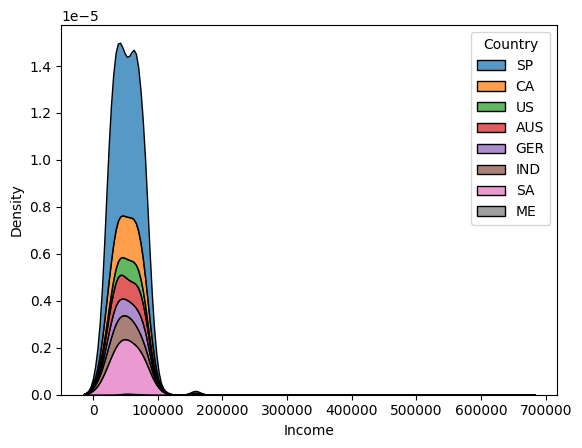

In [ ]:
sns.kdeplot(data=dset, x="Income", hue="Country", multiple="stack")

In [ ]:
dset[dset['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [ ]:
dset.drop(dset[dset['Income'] == 666666].index, inplace = True) #Drop one customer, who has 666666 $ income.

<ipython-input-26-36f53c413c7b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset['Income'], kde=True, hist=True)


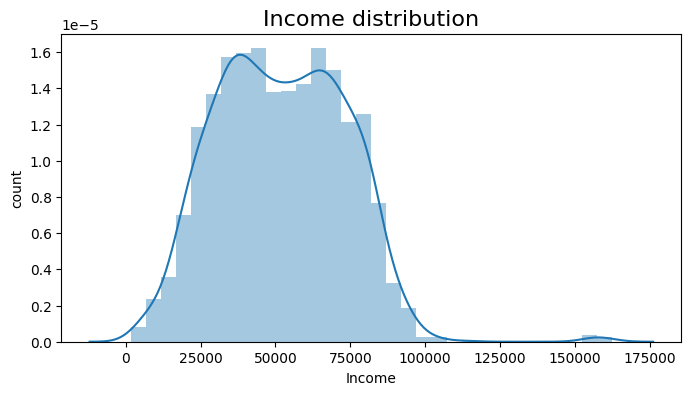

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(dset['Income'], kde=True, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

ValueError: could not convert string to float: 'Graduation'

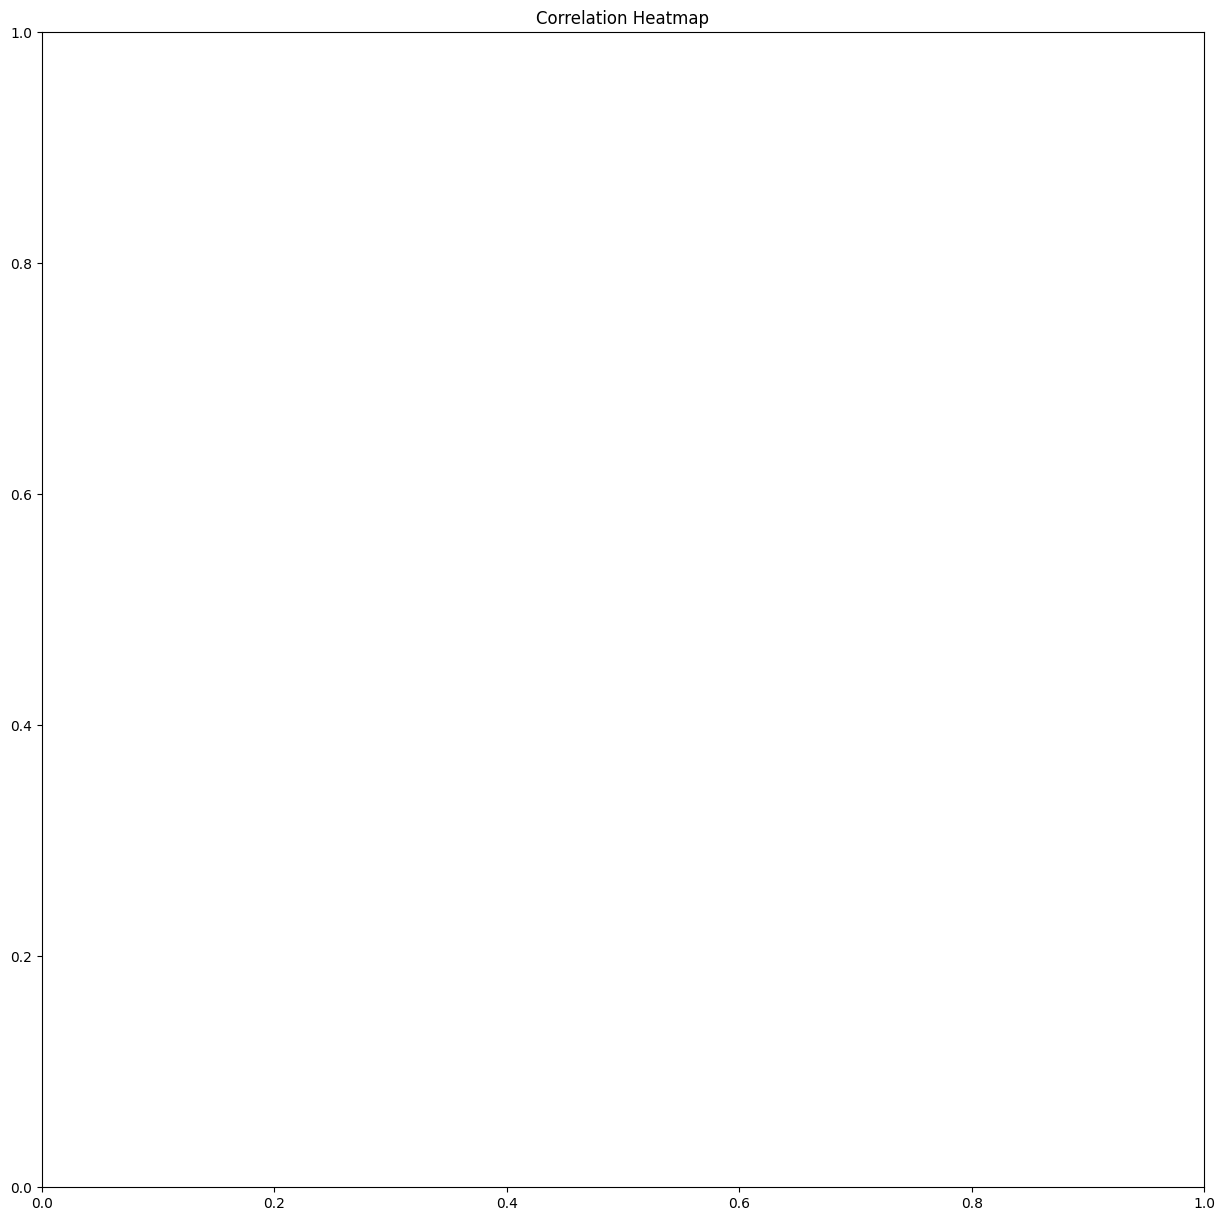

In [ ]:
plt.figure(figsize=(15,15)) #Corellation Heatmap
plt.title(label = "Correlation Heatmap")
sns.heatmap(dset.corr(), annot=True)
plt.show()

## Statistical Analysis

<ipython-input-28-9f823b009e5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset['MntFishProducts'], kde=False, hist=True, bins=12)


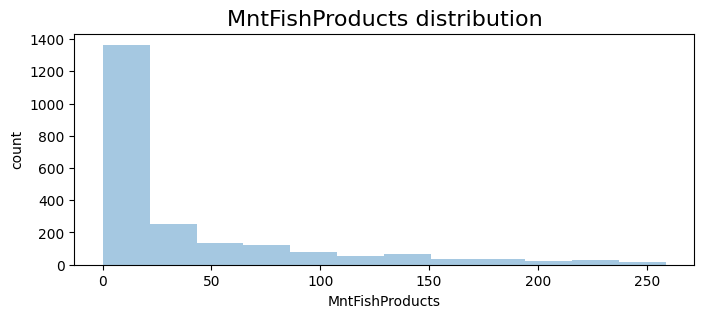

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(dset['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

<ipython-input-30-d3b8d2447492>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dset['NumStorePurchases'], kde=False, hist=True, bins=12)


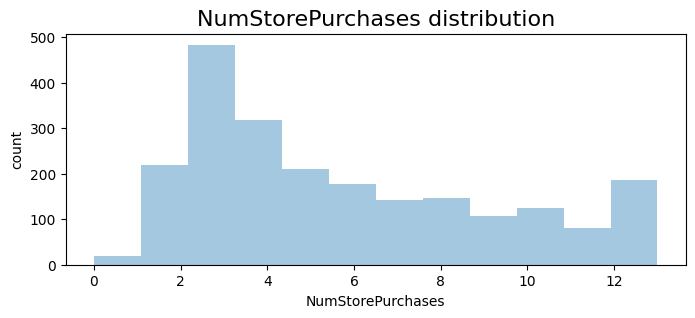

In [ ]:
plt.figure(figsize=(8,3))
sns.distplot(dset['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');


In [ ]:
print("Total categories in the feature Education:\n\n")
print(dset["Education"].value_counts())

Total categories in the feature Education:


Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64


In [ ]:
fig = px.pie(dset, names='Education')
fig.show()

NameError: name 'px' is not defined

In [ ]:
print("Total categories in the feature Marital_Status:\n")
print(dset["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:

Marital_Status
Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64 



In [ ]:
dset.drop(dset[dset['Marital_Status'] == "YOLO"].index, inplace = True)
dset.drop(dset[dset['Marital_Status'] == "Absurd"].index, inplace = True)
dset.drop(dset[dset['Marital_Status'] == "Alone"].index, inplace = True)

In [ ]:
fig = px.pie(dset, names='Marital_Status')
fig.show()

In [ ]:
# fig = px.histogram(dset,  x=" Income", y="Education", title="Income by Education")
# fig.show()

In [ ]:
dset["Dt_Customer"][dset["Response"] == 1].dt.month.value_counts()
 #Count month when customers enroll with the company


In [ ]:
dset["Dt_Customer"][dset["Response"] == 1].dt.weekday.value_counts()
#Count days of week when customers enroll with the company

In [ ]:
fig = px.histogram(dset, x="Country", y="TotalMnt", title="Total Amount Spent by Country")
# fig.title('Total Amount Spent by Country', size=16)
# fig.ylabel('Amount Spent');
fig.show()

In [ ]:
sns.barplot(x=dset["Education"],y=dset["Income"])

In [ ]:
plot = plt.bar(dset.groupby(by = "Education").count()["ID"].index.to_list(),
                dset.groupby(by = "Education").count()["ID"].to_list())

for value in plot:  #Add the data value on head of the bar
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.xlabel("Education")
#Add labels and title
plt.ylabel("Income")

plt.rcParams["figure.figsize"] = (10,6)
#Change figure size for better visibility
plt.show()

In [ ]:
dset.pivot_table(["Income"], ["Education","Response"], aggfunc="mean").plot.bar()
plt.show()

In [ ]:
print("Total categories in the feature Countries:\n")
print(dset["Country"].value_counts(), "\n")

In [ ]:
dset['Country'].value_counts().plot(kind='barh', color='skyblue', edgecolor=(0,0,0))

In [ ]:
# plt.figure(figsize=(5,4))
# dset.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
# plt.title('Total Number of Purchases by Country', size=16)
# plt.ylabel('Number of Purchases');

fig = px.histogram(dset, x="Country", y="TotalPurchases", color="Country")
fig.show()

In [ ]:
dset["Marital_Status"][dset["Response"] == 1].value_counts()
#Count Marital_Status of customers of those who accepted last campaign

In [ ]:
plot = plt.bar(dset.groupby(by = "Country").count()["ID"].index.to_list(),
               dset.groupby(by = "Country").count()["ID"].to_list())

for value in plot:  #Add the data value on head of the bar
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.xlabel("Country")  #Add labels and title
plt.ylabel("Customers")

plt.rcParams["figure.figsize"] = (10,6) #Change figure size for better visibility
plt.show()

In [ ]:
sns.histplot(data=dset, x="Country", hue="Complain", multiple="stack")

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1
colors= 'skyblue', 'wheat', 'white'

labels = dset['Kidhome'].unique()
values = dset['Kidhome'].value_counts()
ax1.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') #plot first pie


labels = dset['Teenhome'].unique()
values = dset['Teenhome'].value_counts()
ax2.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie

ax1.set(aspect="equal", title='Those with kids')
ax2.set(aspect="equal", title='Those with teens')
plt.show()

In [ ]:
dset.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Country"], aggfunc="sum").plot.bar()
plt.show()

In [ ]:
dset.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Education"], aggfunc="sum").plot.bar()
plt.show()

In [ ]:
# convert country codes to correct nomenclature for choropleth plot
# the dataset doesn't provide information about country codes
## ...so I'm taking my best guess about the largest nations that make sense given the codes provided
dset['Country_code'] = dset['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = dset[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

In [ ]:
dset.pivot_table(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

In [ ]:
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(10,10))
# 1,5 denotes 1 row, 5 columns

colors= 'palevioletred', 'pink'

labels = dset['AcceptedCmp1'].unique()
values =  dset['AcceptedCmp1'].value_counts()
ax1.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = dset['AcceptedCmp2'].unique()
values = dset['AcceptedCmp2'].value_counts()
ax2.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = dset['AcceptedCmp3'].unique()
values = dset['AcceptedCmp3'].value_counts()
ax3.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = dset['AcceptedCmp4'].unique()
values = dset['AcceptedCmp4'].value_counts()
ax4.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = dset['AcceptedCmp5'].unique()
values = dset['AcceptedCmp5'].value_counts()
ax5.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

ax1.set(aspect="equal", title='Campaign 1')
ax2.set(aspect="equal", title='Campaign 2')
ax3.set(aspect="equal", title='Campaign 3')
ax4.set(aspect="equal", title='Campaign 4')
ax5.set(aspect="equal", title='Campaign 5')
plt.show()

In [ ]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(dset[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100,
                           columns=['Percent']).reset_index()

# plot
sns.lineplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

In [ ]:
# list of cols with binary responses
binary_cols = [col for col in dset.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending
mnt_cols = [col for col in dset.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in dset.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [ ]:

# average customer demographics
demographics = pd.DataFrame(round(dset.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

In [ ]:
spending = pd.DataFrame(round(dset[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending)
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

In [ ]:
channels = pd.DataFrame(round(dset[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels)
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

In [ ]:
g = sns.FacetGrid(df_cam2, col='Campaign', col_wrap=3)
g.map(sns.barplot, 'Country', 'Accepted (%)')

In [ ]:
#compare countries
countries = dset[['Country', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases' ]]

countries.plot.hist(alpha=0.5)

In [ ]:
 #Which products are performing best?
colors='darkred','orange', 'lightcoral', 'cadetblue', 'pink', 'gold'
products = dset[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts' ,'MntGoldProds']]
products.sum().plot(kind='bar',figsize=(6,5),edgecolor=(0,0,0), color=colors, rot=45)

In [ ]:


dset.pivot_table(["MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntGoldProds"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

In [ ]:
#Which channels are underperforming?
channels = dset[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
colors='gray','darkgreen', 'purple', 'sienna', 'mediumblue'
channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

# Reccomendation:

- The Spanish market needs to be prioritized because of its performance.

- It’s better to use the same marketing campaign as the last campaign is the most successful, and keep focusing on wine and meat products.

- Make an update of the company website, as customers with high income are less likely to shop online on this web-site.






